In [1]:
#Importing libraries

import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
print('Training Data Shape: ',df_train.shape)
print('Testing Data Shape: ',df_test.shape)

Training Data Shape:  (42000, 785)
Testing Data Shape:  (28000, 784)


In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Label counts
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

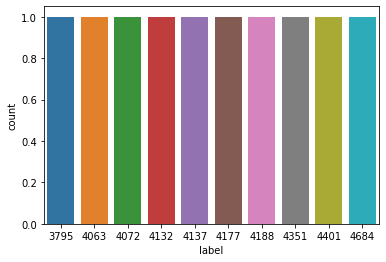

In [7]:
import seaborn as sns

sns.countplot(df_train['label'].value_counts())

> *Data looks balanced enough.*

In [8]:
hand_digits = df_train['label'].unique()
df_dev = pd.DataFrame()
for digit in hand_digits:
    temp_df_dev = df_train[df_train['label']==digit].head(200)
    df_dev = pd.concat([df_dev,temp_df_dev], axis=0)
    

In [9]:
df_dev['label'].value_counts().sort_index()

0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: label, dtype: int64

In [10]:
#Dropping development dataset from the training dataset

print('Before------->')
print('Training Data Shape: ',df_train.shape)
print('Development Data Shape: ',df_dev.shape)

df_train = pd.concat([df_train, df_dev], axis=0).drop_duplicates(keep = False)

print('After------->')
print('Training Data Shape: ',df_train.shape)
print('Development Data Shape: ',df_dev.shape)

Before------->
Training Data Shape:  (42000, 785)
Development Data Shape:  (2000, 785)
After------->
Training Data Shape:  (40000, 785)
Development Data Shape:  (2000, 785)


In [11]:
#Splitting the data set into feature and label
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0:1]

X_dev = df_dev.iloc[:,1:]
y_dev = df_dev.iloc[:,0:1]

print('X_train shape: ',X_train.shape)
print('y_train shape: ', y_train.shape)

print('X_dev shape: ', X_dev.shape)
print('y_dev shape: ',y_dev.shape)

X_train shape:  (40000, 784)
y_train shape:  (40000, 1)
X_dev shape:  (2000, 784)
y_dev shape:  (2000, 1)


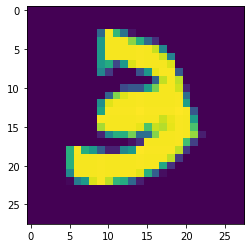

In [12]:
#Training image Example

import random
import matplotlib.pyplot as plt

#Range is defined based on number of training data
random_number = random.randint(-1,40001)

#print(y_train./iloc[random_number,:])
plt.imshow(X_train.iloc[random_number,:].to_numpy().reshape(28,28), interpolation='nearest')
plt.show()


# > *LeNet-5*

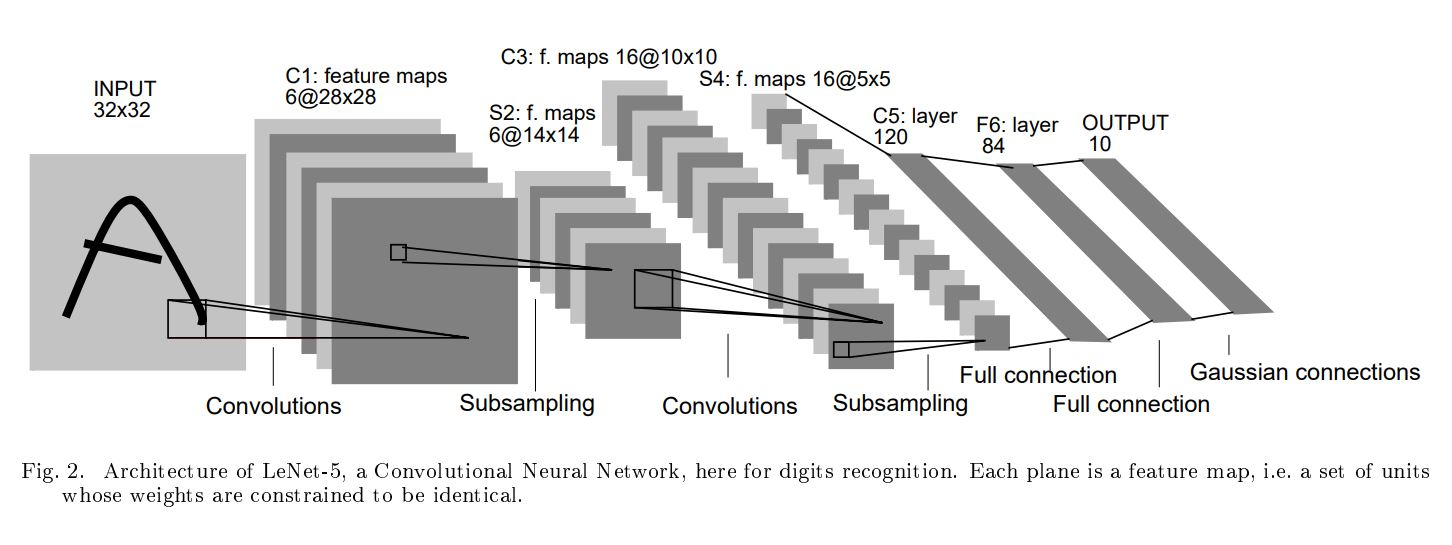

> *Above image is from the paper 'GradientBased Learning Applied to Document
Recognition'.The Neural Network architecture is famously known as LeNet-5.*

> *We will start by making a similar architecture similar to this one, then go from there.*

In [13]:
#Lets start with three neural networks

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [14]:
X_train = X_train.astype('float32')
X_dev = X_dev.astype('float32')



X_train/=255
X_dev/255

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#One hot encoding the label data (Need for Neural Network)


y_train_one_hot = to_categorical(y_train)
y_dev_one_hot = to_categorical(y_dev)


In [16]:
#Reshaping the images into 28*28 pixel
X_train = X_train.to_numpy().reshape(X_train.shape[0],28,28,1)
X_dev = X_dev.to_numpy().reshape(X_dev.shape[0],28,28,1)

# > *CNN Model*

In [17]:
model = Sequential()

#First Layer
model.add(Conv2D(6, (5, 5), padding='same', activation='relu',strides=(1, 1), input_shape=((28,28,1))))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#Second Layer
model.add(Conv2D(16, (5, 5), padding='valid',strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
#Forth Layer
model.add(Dense(120, activation='relu'))
#Fifth Layer
model.add(Dense(84, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))


2022-11-09 11:13:46.233056: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [20]:
history = model.fit(X_train, y_train_one_hot, batch_size=64, verbose=1, validation_data=(X_dev, y_dev_one_hot), epochs=200)

2022-11-09 11:13:46.596202: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
625/625 [==============================] - 7s 9ms/step - loss: 0.2840 - accuracy: 0.9146 - val_loss: 14.7090 - val_accuracy: 0.9730
Epoch 2/200
625/625 [==============================] - 5s 9ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 15.6542 - val_accuracy: 0.9720
Epoch 3/200
625/625 [==============================] - 5s 9ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 9.5786 - val_accuracy: 0.9835
Epoch 4/200
625/625 [==============================] - 5s 9ms/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 7.8187 - val_accuracy: 0.9860
Epoch 5/200
625/625 [==============================] - 5s 9ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 7.9836 - val_accuracy: 0.9895
Epoch 6/200
625/625 [==============================] - 6s 10ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 8.5668 - val_accuracy: 0.9865
Epoch 7/200
625/625 [==============================] - 5s 9ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 8.2603 - val_accuracy: 0.9

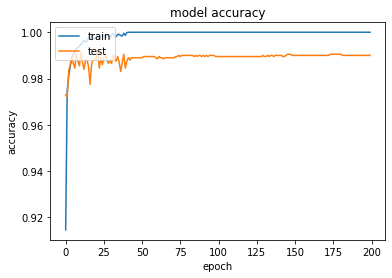

In [21]:
# summarize history for accuracy



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
#Comparing the true and predicted value of Training and Dev set

y_predict_train =model.predict(X_train)
labels_train = [np.argmax(i) for i in y_predict_train]

y_predict_dev =model.predict(X_dev)
labels_dev = [np.argmax(i) for i in y_predict_dev]


In [24]:
train_result_compare=pd.DataFrame()
train_result_compare['y_train_value'] = y_train
train_result_compare['y_train_predict'] = labels_train
#If the true value and predict are same then 1 , else 0
train_result_compare['Result'] = np.where(train_result_compare['y_train_value']==train_result_compare['y_train_predict'],1,0)
train_result_compare.head()

,y_train_value,y_train_predict,Result
1613,2,2,1
1615,2,2,1
1633,2,2,1
1634,2,2,1
1638,2,2,1


In [25]:
dev_result_compare=pd.DataFrame()
dev_result_compare['y_dev_value'] = y_dev
dev_result_compare['y_dev_predict'] = labels_dev
#If the true value and predict are same then 1 , else 0
dev_result_compare['Result'] = np.where(dev_result_compare['y_dev_value']==dev_result_compare['y_dev_predict'],1,0)
dev_result_compare.head()

,y_dev_value,y_dev_predict,Result
0,1,1,1
2,1,1,1
12,1,1,1
15,1,1,1
35,1,1,1


In [26]:
#Analysing how NN performed in detecting each individuals hand written digits

print(train_result_compare[['y_train_value','Result']].value_counts())
print('----------------------------------------------------')
print(dev_result_compare[['y_dev_value','Result']].value_counts())


y_train_value  Result
1              1         4484
7              1         4201
3              1         4151
9              1         3988
2              1         3977
6              1         3937
0              1         3932
4              1         3872
8              1         3863
5              1         3595
dtype: int64
----------------------------------------------------
y_dev_value  Result
0            1         200
3            1         200
8            1         199
6            1         199
5            1         199
2            1         198
7            1         198
4            1         197
1            1         196
9            1         194
             0           6
1            0           4
4            0           3
2            0           2
7            0           2
5            0           1
6            0           1
8            0           1
dtype: int64


In [27]:
train_result_compare[train_result_compare['y_train_value']!=train_result_compare['y_train_predict']].sort_values(by=['y_train_value'])

,y_train_value,y_train_predict,Result


In [28]:
dev_result_compare[dev_result_compare['y_dev_value']!=dev_result_compare['y_dev_predict']].sort_values(by=['y_dev_value'])

,y_dev_value,y_dev_predict,Result
191,1,4,0
622,1,2,0
897,1,8,0
1772,1,2,0
644,2,7,0
1327,2,3,0
445,4,9,0
1224,4,8,0
1935,4,9,0
125,5,3,0


In [30]:
#Predicting the result


df_test = df_test.astype('float32')
df_test/=255
df_test = df_test.to_numpy().reshape(df_test.shape[0],28,28,1)

y_predict =model.predict(df_test)
labels = [np.argmax(i) for i in y_predict]


In [31]:

submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission['Label'] = labels
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [32]:
submission.to_csv('submission.csv', index = False)

from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv